In [323]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [324]:
data = pd.read_csv('Life Expectancy Data.csv')

In [325]:
data.shape

(2938, 22)

In [326]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


<h4>Renaming Columns</h4>

In [327]:
#rename column
orig_cols = list(data.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
data.columns = new_cols

In [328]:
data.rename(columns={'thinness_1-19_years':'thin_1','thinness_5-9_years':'thin_5','hiv/aids':'hivaids','under-five_deaths':\
                    'under_five_deaths'}, inplace=True)

<h4>Variable Description</h4>

* country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
* year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
* status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
* life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
* adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
* infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
* alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
* percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
* hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
* measles (Ratio) - number of reported Measles cases per 1000 population
* bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
* under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
* polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
* total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
* diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
* hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
* gdp (Ratio) - Gross Domestic Product per capita
* population (Ratio) - population of a country
* thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
* thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
* income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* schooling (Ratio) - average number of years of schooling of a population

<h4>Check and handle missing values</h4>

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

In [330]:
# Identify percentage of null values in each column.
data.isna().sum()*100/data.isna().count()

country                            0.000
year                               0.000
status                             0.000
life_expectancy                    0.340
adult_mortality                    0.340
infant_deaths                      0.000
alcohol                            6.603
percentage_expenditure             0.000
hepatitis_b                       18.822
measles                            0.000
bmi                                1.157
under_five_deaths                  0.000
polio                              0.647
total_expenditure                  7.692
diphtheria                         0.647
hivaids                            0.000
gdp                               15.248
population                        22.192
thin_1                             1.157
thin_5                             1.157
income_composition_of_resources    5.684
schooling                          5.548
dtype: float64

In [331]:
country_list = data.country.unique()
fill_list = ['life_expectancy','adult_mortality','alcohol','hepatitis_b','bmi','polio','total_expenditure',\
             'diphtheria','gdp','population','thin_1','thin_5','income_composition_of_resources',\
             'schooling']

for country in country_list:
    data.loc[data['country'] == country,fill_list] = data.loc[data['country'] == country,fill_list].interpolate()

data.dropna(inplace=True)

In [332]:
data[['country','status']] = data[['country','status']].astype('category')

<h4>Check and handle outliers</h4>

In [333]:
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
count,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000
mean,2006.985,67.982,175.187,36.624,4.456,685.492,73.862,2729.562,36.429,50.933,80.372,5.903,80.454,2.275,5392.336,13583902.495,5.130,5.199,0.603,11.639
std,4.323,9.706,131.617,138.785,3.977,1761.669,29.028,12102.389,19.736,188.933,24.363,2.287,24.450,6.005,11480.810,64901129.051,4.750,4.844,0.206,3.213
min,2000.000,36.300,1.000,0.000,0.010,0.000,2.000,0.000,1.400,0.000,3.000,0.370,2.000,0.100,1.681,34.000,0.100,0.100,0.000,0.000
25%,2003.000,61.700,75.000,1.000,0.830,29.470,64.000,0.000,18.150,1.000,74.000,4.360,75.500,0.100,384.553,196748.000,1.600,1.600,0.473,9.700
50%,2007.000,69.900,153.000,4.000,3.770,104.314,86.000,20.000,38.700,4.000,91.000,5.800,91.000,0.100,1334.652,1396861.000,3.300,3.400,0.648,11.900
75%,2011.000,74.700,243.000,25.000,7.190,470.870,95.000,499.500,55.000,36.000,96.000,7.385,96.000,1.400,4441.531,7625918.500,7.600,7.700,0.745,13.700
max,2015.000,89.000,723.000,1800.000,17.870,18961.349,99.000,212183.000,77.100,2500.000,99.000,14.390,99.000,50.600,119172.742,1293859294.000,27.700,28.600,0.936,20.700


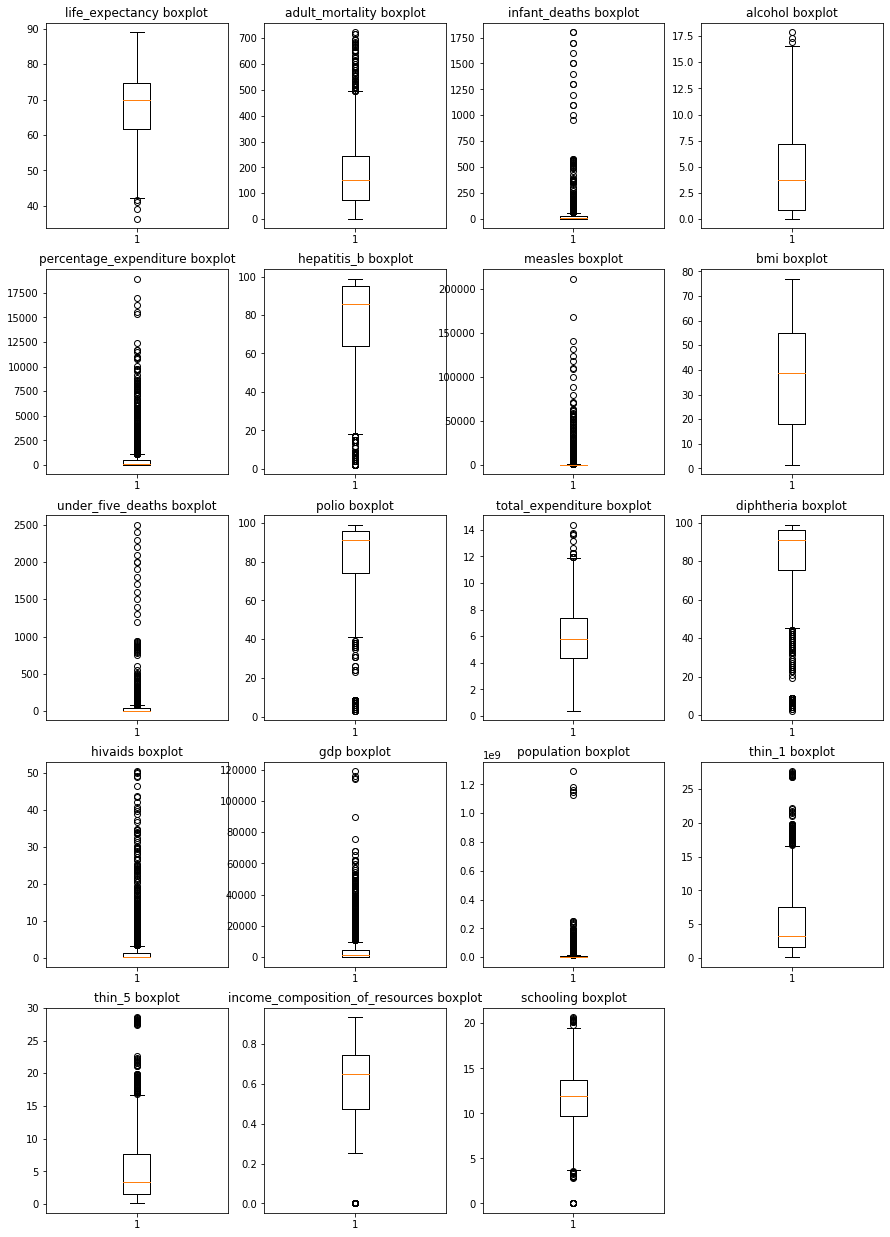

In [334]:
cont_vars = list(data.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()
outliers_visual(data)

Remove outliers

<h4>Check distribution target variable</h4>

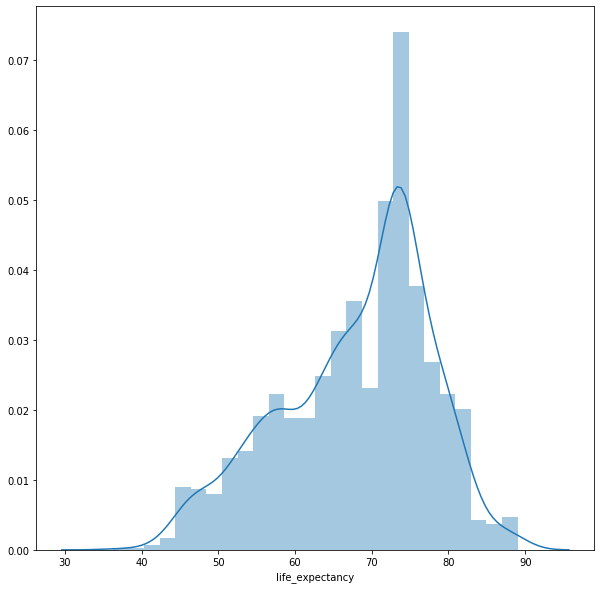

In [335]:
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(data['life_expectancy'])

In [371]:
def check_linearity(data, target_var, SL = 0.05):
    cor_test_list = []
    for col in data.drop(target_var, axis = 1).columns:
        if col in data.select_dtypes('category').columns:
            cor_test = stats.spearmanr(data[col], data[target_var])
            cor_type = "Spearman"
        else:
            cor_test = stats.pearsonr(data[col], data[target_var])
            cor_type = "Pearson"
        cor_dict = {"Predictor": col,
                    "Type": cor_type,
                    "Correlation": cor_test[0],
                    "P-Value": cor_test[1],
                    "Conclusion": "significant" if cor_test[1] < SL else "not significant"}
        cor_test_list.append(cor_dict)
    return pd.DataFrame(cor_test_list)

check_linearity(data, "life_expectancy")

,Predictor,Type,Correlation,P-Value,Conclusion
0,country,Spearman,-0.075,0.001,significant
1,year,Pearson,0.171,0.000,significant
2,status,Spearman,-0.502,0.000,significant
3,adult_mortality,Pearson,-0.661,0.000,significant
4,infant_deaths,Pearson,-0.161,0.000,significant
5,alcohol,Pearson,0.393,0.000,significant
6,percentage_expenditure,Pearson,0.414,0.000,significant
7,hepatitis_b,Pearson,0.250,0.000,significant
8,measles,Pearson,-0.138,0.000,significant
9,bmi,Pearson,0.600,0.000,significant


<h4>Modelling</h4>

<h4>Model 1 all variable</h4>

In [336]:
X_ = data.drop(["life_expectancy"], axis = 1)
y = data.life_expectancy.values

In [337]:
X = pd.get_dummies(X_, columns = data.select_dtypes('category').columns, drop_first = True)
X.head()

Index(['year', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio',
       ...
       'country_Turkey', 'country_Turkmenistan', 'country_Uganda',
       'country_Ukraine', 'country_Uruguay', 'country_Uzbekistan',
       'country_Vanuatu', 'country_Zambia', 'country_Zimbabwe',
       'status_Developing'],
      dtype='object', length=152)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)


X Train: (1589, 152)
X Test: (398, 152)
y Train: (1589,)
y Test: (398,)


In [339]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [340]:
predictions = lm.predict(X_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred1 = pred.head(10)
pred1

,Actual,Predicted
0,69.400,68.213
1,69.400,68.384
2,66.300,66.243
3,61.400,63.269
4,64.000,64.588
5,77.000,77.130
6,73.700,74.126
7,57.900,59.836
8,62.800,62.752
9,74.300,74.955


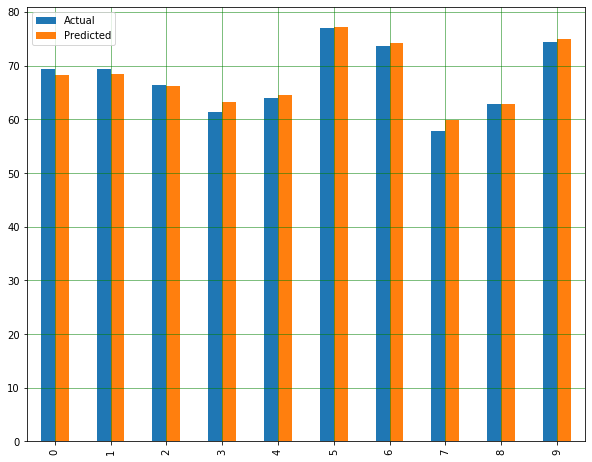

In [341]:
pred1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [342]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.2567053665338723
Mean Squared Error: 5.145410180714546
Root Mean Squared Error: 2.2683496601526287


In [343]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     345.3
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        15:45:36   Log-Likelihood:                -3975.6
No. Observations:                1987   AIC:                             8255.
Df Residuals:                    1835   BIC:                             9105.
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             -441.7063     27.400    -16.120      0.000    -495.445    -387.967
year                                 0.2690      0.015     18.455      0.000       0.240       0.298
adult_mortality                     -0.0019      0.000     -3.957      0.000      -0.003      -0.001
infant_deaths                        0.0855      0.012      7.022      0.000       0.062       0.109
alcohol                             -0.0939      0.031     -3.048      0.002      -0.154      -0.033
percentage_expenditure            2.395e-05      0.000      0.221      0.825      -0.000       0.000
hepatitis_b                          0.0016      0.002      0.688      0.492      -0.003       0.006
measles                          -1.217e-05   5.11e-06     -2.382      0.017   -2.22e-05   -2.15e-06
bmi                                 -0.0024      0.004     -0.641      0.522      -0.010       0.005
under_five_deaths                   -0.0636      0.009     -7.347      0.000      -0.081      -0.047
polio                                0.0006      0.003      0.214      0.831      -0.005       0.006
total_expenditure                   -0.0601      0.027     -2.226      0.026      -0.113      -0.007
diphtheria                           0.0022      0.003      0.765      0.445      -0.003       0.008
hivaids                             -0.3006      0.016    -18.362      0.000      -0.333      -0.268
gdp                              -4.285e-06   1.67e-05     -0.257      0.797    -3.7e-05    2.85e-05
population                       -8.582e-10   8.61e-10     -0.996      0.319   -2.55e-09    8.31e-10
thin_1                               0.0290      0.029      1.009      0.313      -0.027       0.085
thin_5                               0.0236      0.028      0.835      0.404      -0.032       0.079
income_composition_of_resources      0.6111      0.521      1.174      0.241      -0.410       1.632
schooling                            0.1541      0.051      3.008      0.003       0.054       0.255
country_Albania                     16.5306      0.823     20.076      0.000      14.916      18.145
country_Algeria                     14.1911      0.778     18.230      0.000      12.664      15.718
country_Angola                      -6.4303      0.768     -8.370      0.000      -7.937      -4.924
country_Argentina                   16.3079      0.916     17.800      0.000      14.511      18.105
country_Armenia                     14.8501      0.814     18.246      0.000      13.254      16.446
country_Australia                  -18.7932      1.336    -14.070      0.000     -21.413     -16.174
country_Austria                    -18.4031      1.452    -12.677      0.000     -21.250     -15.556
country_Azerbaijan                  12.0077      0.79

<h4>Check Multikolinearity</h4>

In [344]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#gather features
col_dat = data.drop(['life_expectancy'],axis=1)
features = "+".join(col_dat.columns)


In [345]:
y, X = dmatrices('life_expectancy ~' + features, data, return_type='dataframe')

In [346]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\litaimut\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\litaimut\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [347]:
vif[vif["VIF Factor"]>10]

,VIF Factor,features
6,1126181452205.676,country[T.Australia]
7,321685687669321.125,country[T.Austria]
11,25159774454583.777,country[T.Belgium]
18,166799986198907.250,country[T.Bulgaria]
32,2251799813685248.000,country[T.Croatia]
33,158021039556859.500,country[T.Cyprus]
46,13709587906759.500,country[T.Germany]
55,25.555,country[T.India]
58,5358238700024.386,country[T.Ireland]
60,643371375338642.250,country[T.Italy]


<h4>Feature Engineering</h4>

check correlation values on variable infant_deaths, percentage_expenditure, under_five_deaths, gdp, thin_1, thin_5, and schooling

<Figure size 1080x1296 with 0 Axes>

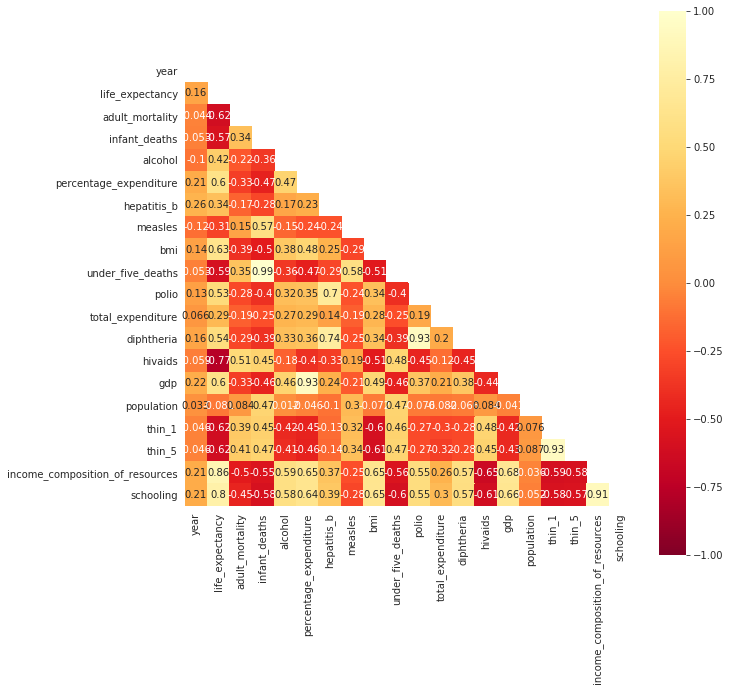

In [348]:
pd.set_option('precision', 3)
correlation=data.corr(method='spearman')
# heatmap of the correlation 
plt.figure(figsize=(15,18))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(correlation, mask=mask, square=True,annot=True,vmin=-1,vmax=1,cmap="YlOrRd_r")


Dari heatmeap korelasi diatas, untuk 7 variable dengan nilai vif > 10 dapat ditarik kesimpulan bahwa :
1. infant_deaths memiliki korelasi yang tinggi dengan under_five_death dengan nilai korelasi 0.99. Hal ini dikarenakan usia 5 tahun tergolong ke dalam usia bayi. Kita dapat melakukan penghapusan salah satu dari 2 variable yang saling berkaitan tersebut.
2. precentage_expenditure memiliki nilai korelasi yang tinggi dengan gdp yaitu dengan nilai 0.93. Pada metode feature enginering ini kita dapat melakukan perkalian antar ke dua variable tersebut.
3. thin_1 memiliki nilai korelasi yang tinggi dengan thin_5 yaitu sebesar 0.93. Pada metode feature enginering ini kita dapat mencari nilai rata-rata dari ke2 variable tersebut.
4. schooling memiliki korelasi yang tinggi dengan income_composition. Pada metode feature enginering ini kita dapat mencari nilai rata-rata dari ke2 variable tersebut.


In [349]:
data_new = data.copy()

In [350]:
data_new.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hivaids', 'gdp', 'population', 'thin_1', 'thin_5',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [351]:
#1. Drop under_five_death variable
data_new.drop(['under_five_deaths'], axis=1, inplace=True)

In [352]:
#2. Multiply between precentage_expenditure and gdp and then drop precentage expenditure
data_new['health_expenditure'] = data_new.percentage_expenditure * data_new.gdp
data_new.drop(['percentage_expenditure'], axis=1, inplace=True)

In [355]:
#3. Mean between thin 1 and thin 5
data_new['thinnes'] = (data_new.thin_1 + data_new.thin_5)/2
data_new.drop(['thin_1','thin_5'], axis=1, inplace=True)

In [356]:
#4. Mean between schooling and income
data_new['educated_income'] = (data_new.income_composition_of_resources + data_new.schooling)/2
data_new.drop(['income_composition_of_resources','schooling'], axis=1, inplace=True)

<h4>Model 2 (after feature engineering)</h4>

In [358]:
X_new_mod = data_new.drop(["life_expectancy"], axis = 1)
y_new = data_new.life_expectancy.values

In [360]:
X_new = pd.get_dummies(X_new_mod, columns = data_new.select_dtypes('category').columns, drop_first = True)


,year,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,polio,total_expenditure,diphtheria,...,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Zambia,country_Zimbabwe,status_Developing
0,2015,263.000,62,0.010,65.000,1154,19.100,6.000,8.160,65.000,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.000,64,0.010,62.000,492,18.600,58.000,8.180,62.000,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.000,66,0.010,64.000,430,18.100,62.000,8.130,64.000,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.000,69,0.010,67.000,2787,17.600,67.000,8.520,67.000,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.000,71,0.010,68.000,3013,17.200,68.000,7.870,68.000,...,0,0,0,0,0,0,0,0,0,1


In [361]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)
print("X Train:", X_train_new.shape)
print("X Test:", X_test_new.shape)
print("y Train:", y_train_new.shape)
print("y Test:", y_test_new.shape)


X Train: (1589, 149)
X Test: (398, 149)
y Train: (1589,)
y Test: (398,)


In [362]:
lm_new = LinearRegression()
lm_new.fit(X_train_new,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [364]:
predictions_new = lm_new.predict(X_test_new)
pred_new = pd.DataFrame({'Actual': y_test_new, 'Predicted': predictions_new})

In [366]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, predictions_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, predictions_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, predictions_new)))

Mean Absolute Error: 1.2763559993980067
Mean Squared Error: 5.3966372869190335
Root Mean Squared Error: 2.3230663543943453


In [370]:
X_new=sm.add_constant(X_new)
model_new=sm.OLS(y_new,X_new).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     342.5
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        16:45:08   Log-Likelihood:                -4004.0
No. Observations:                1987   AIC:                             8306.
Df Residuals:                    1838   BIC:                             9140.
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             -454.2424     27.244    -16.673      0.000    -507.676    -400.809
year                                 0.2755      0.014     19.009      0.000       0.247       0.304
adult_mortality                     -0.0019      0.000     -3.831      0.000      -0.003      -0.001
infant_deaths                       -0.0031      0.002     -1.832      0.067      -0.006       0.000
alcohol                             -0.1020      0.031     -3.271      0.001      -0.163      -0.041
hepatitis_b                          0.0009      0.002      0.396      0.692      -0.004       0.006
measles                          -1.758e-05   5.12e-06     -3.436      0.001   -2.76e-05   -7.54e-06
bmi                                 -0.0020      0.004     -0.531      0.596      -0.009       0.005
polio                            -1.312e-05      0.003     -0.005      0.996      -0.005       0.005
total_expenditure                   -0.0616      0.027     -2.251      0.025      -0.115      -0.008
diphtheria                           0.0042      0.003      1.457      0.145      -0.001       0.010
hivaids                             -0.3060      0.017    -18.499      0.000      -0.338      -0.274
gdp                               -1.37e-05   1.07e-05     -1.285      0.199   -3.46e-05    7.22e-06
population                        1.406e-10   8.61e-10      0.163      0.870   -1.55e-09    1.83e-09
health_expenditure                  1.2e-09   8.81e-10      1.362      0.173   -5.28e-10    2.93e-09
thinnes                              0.0321      0.025      1.287      0.198      -0.017       0.081
educated_income                      0.3848      0.096      3.989      0.000       0.196       0.574
country_Albania                     16.1294      0.829     19.467      0.000      14.504      17.754
country_Algeria                     14.1113      0.787     17.941      0.000      12.569      15.654
country_Angola                      -7.6598      0.758    -10.112      0.000      -9.145      -6.174
country_Argentina                   15.9896      0.926     17.260      0.000      14.173      17.806
country_Armenia                     14.4922      0.819     17.700      0.000      12.886      16.098
country_Australia                  -19.5875      1.310    -14.958      0.000     -22.156     -17.019
country_Austria                    -18.9417      1.445    -13.112      0.000     -21.775     -16.108
country_Azerbaijan                  11.7138      0.797     14.696      0.000      10.151      13.277
country_Bangladesh                  10.5975      0.724     14.635      0.000       9.177      12.018
country_Belarus                     11.6336      0.935     12.438      0.000       9.799      13.468
country_Belgium                    -20.1332      1.41

<h4>Homoscedasticity</h4>

Text(0, 0.5, 'Residual')

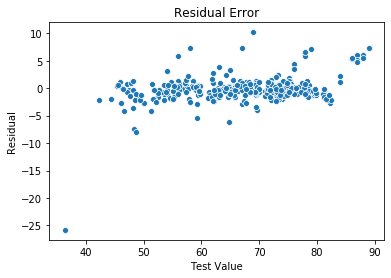

In [380]:
residual = y_test_new - predictions_new
sns.scatterplot(y_test_new,residual)
plt.title('Residual Error')
plt.xlabel('Test Value')
plt.ylabel('Residual')